### Use PCA To Reduce Number of Columns

In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.decomposition import PCA

In [3]:
p53_clean = pd.read_csv('p53_clean.csv', index_col=0)

###### heavy imbalance

In [4]:
p53_clean['Activity'].value_counts()

inactive    16449
active        143
Name: Activity, dtype: int64

In [5]:
y = p53_clean['Activity']
X = p53_clean.drop(['Activity', 'Mutation'], axis=1)

In [6]:
pca = PCA(n_components=60)
pca.fit(X)
pca_X = pca.transform(X)

In [7]:
sum(pca.explained_variance_ratio_)

0.912759592041824

In [8]:
pca.components_[0]

array([ 8.54825847e-05,  5.04186112e-05,  2.57219310e-05, ...,
       -6.85638827e-06, -3.26821800e-06,  1.92276476e-05])

In [9]:
pca_data = pd.DataFrame(pca_X)
pca_data['Mutation'] = p53_clean['Mutation']
pca_data['Activity'] = p53_clean['Activity']

### Modeling

In [10]:
from sklearn.model_selection import train_test_split, learning_curve, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

##### Main Modeling Function

In [11]:
def model_assessment(model, X_full, y_full):
    """
    Performs train-test split and fits to a given model
    ---------------------------------------------------
    
    Arguments
    model - Classifier model (with any required arguments)
    X_full - Full feature dataset (with target removed)
    y_full - Predicted variable
    
    Returns
    Accuracy, Precision, Recall, F1, and a Confusion Matrix
    """
    X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size=0.3, random_state=4444, stratify=y_full)
    model.fit(X_train, y_train)
    y_p = model.predict(X_test)
    y_p2 = model.predict_proba(X_test)[:,1]
    y_p_train = model.predict(X_train)
    y_p2_train = model.predict_proba(X_train)[:,1]
    print(model)
    print('Accuracy score for:', accuracy_score(y_test, y_p))
    print('Precision score for:', precision_score(y_test, y_p))
    print('Recall score for:', recall_score(y_test, y_p))
    print('F1 score for:', f1_score(y_test, y_p))
    print('\nTest AUC score:', roc_auc_score(y_test, y_p2))
    print('\nTest Confusion Matrix:\n', confusion_matrix(y_test, y_p))
    print('\nTrain AUC score:', roc_auc_score(y_train, y_p2_train))
    print('\nTrain Confusion Matrix:\n', confusion_matrix(y_train, y_p_train))
    
    return model

In [12]:
y = p53_clean['Activity']
X = p53_clean.drop(['Activity', 'Mutation'], axis=1)

In [13]:
#divide up data by 2d and 3d features
p53_3d = p53_clean.iloc[:, 4826:]
p53_2d = p53_clean.iloc[:, :4825]
p53_2d['Activity'] = p53_clean['Activity']
p53_2d['Mutation'] = p53_clean['Mutation']

In [14]:
y_2d = p53_2d['Activity']
X_2d = p53_2d.drop(['Activity', 'Mutation'], axis=1)
y_3d = p53_3d['Activity']
X_3d = p53_3d.drop(['Activity', 'Mutation'], axis=1)

In [15]:
lr = LogisticRegression(solver='lbfgs', C=0.5)
rfc = RandomForestClassifier(n_estimators=100)
knn = KNeighborsClassifier(n_neighbors=4)
nb_g = GaussianNB()
nb_b = BernoulliNB()
svm = SVC()
tree = DecisionTreeClassifier()

In [16]:
#model_assessment(rfc, X, y)

In [17]:
#model_assessment(lr, X, y)

In [18]:
#model_assessment(tree, X, y)

#### Try random undersampling to reduce number of 'active' samples

In [19]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

Using TensorFlow backend.


##### Undersampling Model Function

In [20]:
def model_undersampling(model, X_full, y_full):
    """
    Performs train-test split and fits to a given model including undersampling
    ---------------------------------------------------------------------------
    
    Arguments
    model - Classifier model (with any required arguments)
    X_full - Full feature dataset (with target removed)
    y_full - Predicted variable
    
    Returns
    Accuracy, Precision, Recall, F1, and a Confusion Matrix
    """
    X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size=0.3,random_state=4444)
    X_train_under, y_train_under = RandomUnderSampler(random_state=42).fit_sample(X_train,y_train)
    model.fit(X_train_under, y_train_under)
    y_p = model.predict(X_test)
    y_p2 = model.predict_proba(X_test)[:,1]
    y_p_train = model.predict(X_train)
    y_p2_train = model.predict_proba(X_train)[:,1]
    print(model)
    print('Accuracy score for:', accuracy_score(y_test, y_p))
    print('Precision score for:', precision_score(y_test, y_p))
    print('Recall score for:', recall_score(y_test, y_p))
    print('F1 score for:', f1_score(y_test, y_p))
    print('\nTest AUC score:', roc_auc_score(y_test, y_p2))
    print('\nTest Confusion Matrix:\n', confusion_matrix(y_test, y_p))
    print('\nTrain AUC score:', roc_auc_score(y_train, y_p2_train))
    print('\nTrain Confusion Matrix:\n', confusion_matrix(y_train, y_p_train))
    
    return model

In [21]:
#model_undersampling(rfc, X, y)

In [22]:
#model_undersampling(rfc, X_2d, y_2d)

In [23]:
#model_undersampling(rfc, X_3d, y_3d)

#### Try SMOTE to increase number of 'inactive' samples

##### SMOTE Model Function

In [100]:
def model_SMOTE(model, X_full, y_full):
    """
    Performs train-test split and fits to a given model including SMOTE
    -------------------------------------------------------------------
    
    Arguments
    model - Classifier model (with any required arguments)
    X_full - Full feature dataset (with target removed)
    y_full - Predicted variable
    
    Returns
    Accuracy, Precision, Recall, F1, and a Confusion Matrix
    """
    X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size=0.3,random_state=4444)
    X_train_smoted, y_train_smoted = SMOTE(random_state=42, k_neighbors=9).fit_sample(X_train,y_train)
    model.fit(X_train_smoted, y_train_smoted)
    y_p = model.predict(X_test)
    y_p2 = model.predict_proba(X_test)[:,1]
    y_p_train = model.predict(X_train)
    y_p2_train = model.predict_proba(X_train)[:,1]
    print(model)
    print('Accuracy score for:', accuracy_score(y_test, y_p))
    print('Precision score for:', precision_score(y_test, y_p))
    print('Recall score for:', recall_score(y_test, y_p))
    print('F1 score for:', f1_score(y_test, y_p))
    print('\nTest AUC score:', roc_auc_score(y_test, y_p2))
    print('\nTest Confusion Matrix:\n', confusion_matrix(y_test, y_p))
    print('\nTrain AUC score:', roc_auc_score(y_train, y_p2_train))
    print('\nTrain Confusion Matrix:\n', confusion_matrix(y_train, y_p_train))
    
    plot_confusion_matrix(y_test, y_p, classes = ['active', 'inactive'])
    
    return model

In [25]:
#model_SMOTE(rfc, X, y)

In [26]:
#i_features = list(enumerate(rfc.feature_importances_))
#i_features.sort(key=lambda x: x[1], reverse=True)

In [27]:
#i_features[0:20]

In [28]:
#model_assessment(rfc, X_3d, y_3d)

In [29]:
#i_3d_features = list(enumerate(rfc.feature_importances_))
#i_3d_features.sort(key=lambda x: x[1], reverse=True)

In [30]:
#i_3d_features[0:20]

### Exploratory Plots

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
pca_data.head()

,0,1,2,3,4,5,6,7,8,9,...,52,53,54,55,56,57,58,59,Mutation,Activity
0,-99.034409,-7.419601,-40.188607,-24.842250,14.403953,21.816217,-15.134985,-1.920683,-29.507110,5.795828,...,3.226206,-1.582795,2.368294,-1.945532,0.636729,8.769235,1.197389,5.005322,a119e,inactive
1,-94.147791,-56.094259,16.929008,-17.272232,-2.979882,7.822706,-11.567577,10.894727,16.630890,1.006128,...,-3.388685,-8.674859,1.304082,-0.997284,-1.276916,2.749201,5.084434,0.964273,a119e_l125p,inactive
2,-102.587280,39.656470,-51.129907,-29.499727,-16.052961,-11.690440,-14.225221,11.777391,15.325525,36.676883,...,4.413521,-11.795214,0.421899,10.216957,-0.964685,4.311171,8.011866,3.104308,NaN,NaN
3,-121.168330,62.841733,-69.024195,-21.117324,-25.251788,-13.546003,21.214188,3.443880,-34.930914,7.663474,...,27.130440,7.299819,-5.138412,-10.564615,23.996401,-13.307246,14.917676,10.546843,a161t,inactive
4,-87.347339,-26.984050,70.057058,-15.659031,-29.432183,13.047042,-43.374933,12.280241,34.132090,-0.296163,...,30.065458,8.567200,0.323240,-8.809556,12.087187,-1.385999,18.358503,12.150783,c135y,inactive


Text(0.5, 1.0, 'Plot of PC1 vs PC2')

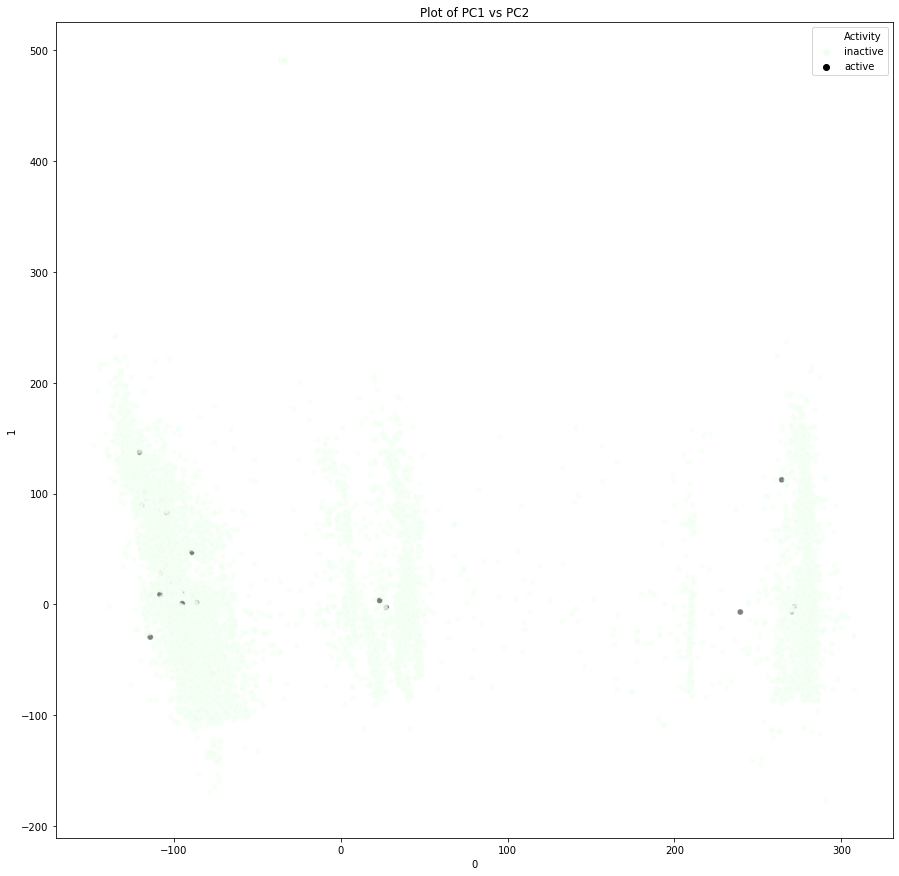

In [33]:
plt.subplots(figsize=(15,15))
sns.scatterplot(x=0, y=1, data=pca_data, hue='Activity', alpha=0.5, palette=['honeydew', 'black']).set_title("Plot of PC1 vs PC2")

Text(0.5, 1.0, 'Plot of RFC Top Feature vs 2nd Top')

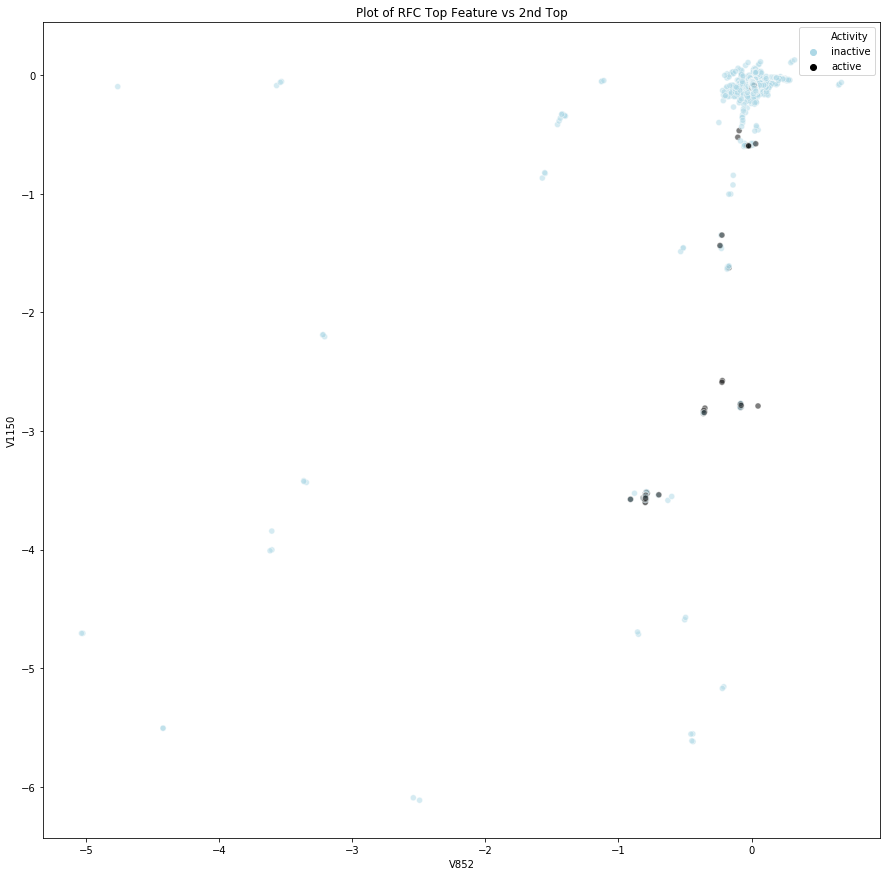

In [34]:
plt.subplots(figsize=(15,15))
sns.scatterplot(x='V852', y='V1150', data=p53_clean, 
                hue='Activity', alpha=0.5, palette=['lightblue', 'black']).set_title("Plot of RFC Top Feature vs 2nd Top")

#### Plot for MVP, Show how important features (2d and 3d) from RFC are related

In [35]:
#mvp_3d = pd.DataFrame(i_3d_features[0:20])

In [36]:
#mvp = pd.DataFrame(i_features[0:20])

In [37]:
#mvp_3d['color'] = mvp_3d[1]

In [38]:
#for i in range(0,20):
#    if mvp.iloc[i,0] >= 1135 and mvp.iloc[i,0] <= 1161:
#        mvp.iloc[i,2] = '1100 region'
#    elif mvp.iloc[i,0] >= 3500 and mvp.iloc[i,0] <= 3577:
#        mvp.iloc[i,2] = '3500 region'
#    else:
#        mvp.iloc[i,2] = 'none'

In [39]:
#for i in range(0,20):
#    if mvp_3d.iloc[i,0] >= 120 and mvp_3d.iloc[i,0] <= 131:
#        mvp_3d.iloc[i,2] = '120 region'
#    elif mvp_3d.iloc[i,0] >= 531 and mvp_3d.iloc[i,0] <= 542:
#        mvp_3d.iloc[i,2] = '530 region'
#    else:
#        mvp_3d.iloc[i,2] = 'none'

In [40]:
#plt.figure(figsize=(6,6))
#ax = sns.barplot(x=0, y=1, data=mvp, hue=mvp['color'], palette=flatui)
#ax.set(xlabel='Relative 2D Position', ylabel='Feature Importance', title='2D Features')
#sns.despine()
#ax.set(xticklabels=[])
#plt.show()

In [41]:
#flatui = ["#9b59b6", "#3498db", "#95a5a6"]

In [42]:
#plt.figure(figsize=(6,6))
#ax = sns.barplot(x=0, y=1, data=mvp_3d, hue=mvp_3d['color'], palette=flatui)
#ax.set(xlabel='Relative 3D Position', ylabel='Feature Importance', title='3D Features')
#sns.despine()
#ax.set(xticklabels=[])
#plt.show()

### Let's Try Looking At 1D (Mutation) Effects

(since these are more interpretable)

In [43]:
from sklearn.feature_extraction.text import CountVectorizer

In [44]:
mutations = p53_clean.filter(['Mutation', 'Activity'], axis=1)

In [45]:
mutations['s'] = mutations['Mutation'].str.replace('_', ' ')

In [46]:
cv = CountVectorizer()

In [47]:
cv.fit(mutations['s'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [48]:
p53_1d = pd.DataFrame(cv.transform(mutations.s).todense(), columns=cv.get_feature_names())

In [49]:
p53_1d['Activity'] = mutations['Activity'].values

In [50]:
p53_1d.head()

,a119c,a119d,a119e,a119f,a119g,a119h,a119i,a119k,a119l,a119m,...,y236m,y236n,y236p,y236q,y236r,y236s,y236t,y236v,y236w,Activity
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,inactive
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,inactive
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,inactive
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,inactive
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,inactive


#### Modeling

In [51]:
X = p53_1d.drop('Activity', axis=1)
y = p53_1d['Activity']

In [52]:
#model_assessment(nb_b, X, y)

In [53]:
#model_undersampling(nb_b, X, y)

In [54]:
#model_SMOTE(nb_b, X, y)

#### Find counts of top features (mutation locations) to visualize in PyMol

In [55]:
#active_class_prob_sorted = nb_b.feature_log_prob_[0, :].argsort()
#inactive_class_prob_sorted = nb_b.feature_log_prob_[1, :].argsort()

AttributeError: 'BernoulliNB' object has no attribute 'feature_log_prob_'

In [56]:
#top50_active_sites = list(np.take(cv.get_feature_names(), active_class_prob_sorted[:50]))
#top50_inactive_sites = list(np.take(cv.get_feature_names(), inactive_class_prob_sorted[:50]))

In [57]:
from collections import Counter

In [58]:
def get_position_counts(mutations):
    pos = []
    for i in range(0,len(mutations)):
        pos.append(mutations[i][1:-1])
    print(Counter(pos))

In [ ]:
#get_position_counts(top50_active_sites)

In [59]:
#get_position_counts(top50_inactive_sites)

NameError: name 'top50_inactive_sites' is not defined

#### DNA Features Viewer

In [60]:
from dna_features_viewer import GraphicFeature, GraphicRecord

In [61]:
raw_sequence = 'MEEPQSDPSVEPPLSQETFSDLWKLLPENNVLSPLPSQAMDDLMLSPDDIEQWFTEDPGPDEAPRMPEAAPRVAPAPAAPTPAAPAPAPSWPLSSSVPSQKTYQGSYGFRLGFLHSGTAKSVTCTYSPALNKMFCQLAKTCPVQLWVDSTPPPGTRVRAMAIYKQSQHMTEVVRRCPHHERCSDSDGLAPPQHLIRVEGNLRVEYLDDRNTFRHSVVVPYEPPEVGSDCTTIHYNYMCNSSCMGGMNRRPILTIITLEDSSGNLLGRNSFEVHVCACPGRDRRTEEENLRKKGEPHHELPPGSTKRALSNNTSSSPQPKKKPLDGEYFTLQIRGRERFEMFRELNEALELKDAQAGKEPGGSRAHSSHLKSKKGQSTSRHKKLMFKTEGPDSD'


In [62]:
raw_sequence.lower()

'meepqsdpsvepplsqetfsdlwkllpennvlsplpsqamddlmlspddieqwftedpgpdeaprmpeaaprvapapaaptpaapapapswplsssvpsqktyqgsygfrlgflhsgtaksvtctyspalnkmfcqlaktcpvqlwvdstpppgtrvramaiykqsqhmtevvrrcphhercsdsdglappqhlirvegnlrveylddrntfrhsvvvpyeppevgsdcttihynymcnsscmggmnrrpiltiitledssgnllgrnsfevhvcacpgrdrrteeenlrkkgephhelppgstkralsnntssspqpkkkpldgeyftlqirgrerfemfrelnealelkdaqagkepggsrahsshlkskkgqstsrhkklmfktegpdsd'

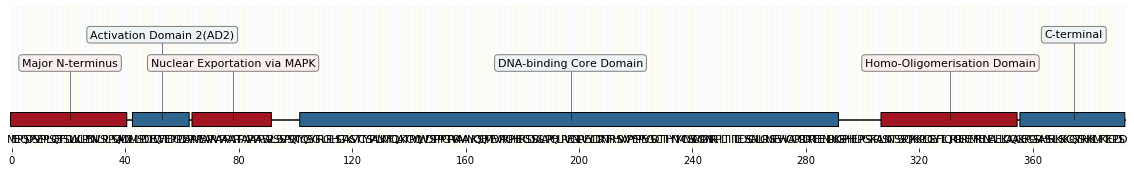

In [63]:
features=[
    GraphicFeature(start=0, end=41, color="#a31621",
                   label="Major N-terminus"),
    GraphicFeature(start=43, end=63, color="#2f6690",
                   label="Activation Domain 2(AD2)"),
    GraphicFeature(start=64, end=92, color="#a31621",
                   label="Nuclear Exportation via MAPK"),
    GraphicFeature(start=102, end=292, color="#2f6690",
                   label="DNA-binding Core Domain"),
    GraphicFeature(start=307, end=355,color="#a31621",
                   label="Homo-Oligomerisation Domain"),
    GraphicFeature(start=356, end=393,color="#2f6690",
                   label="C-terminal")
]
record = GraphicRecord(sequence=raw_sequence, features=features)
record.plot(plot_sequence=True, figure_width=20);

In [64]:
mutations_unique = list(dict.fromkeys([x for y in mutations['Mutation'] for x in y.split('_')]))

In [65]:
positions = [int(x[1:-1]) for x in mutations_unique]

In [66]:
print(min(positions), max(positions))

96 289


In [67]:
set_pos = set(positions)

In [68]:
len(set_pos)

194

In [69]:
raw_sequence[96]

'V'

In [70]:
#number of unique mutations
len(mutations_unique)

3685

### Reduce specificity of mutations from being per codon option to simply mutated/non-mutated

aka reduce number of columns from ~3,000 to 196!

In [71]:
xpositions = set([x[1:-1] for x in p53_1d.columns[:-1]])

In [72]:
xcolumns = p53_1d.columns[:-1]

In [73]:
xpositions = [x for x in xpositions]

In [74]:
xdf = pd.DataFrame(np.zeros(p53_1d.shape[0]))

ohs  = np.zeros(p53_1d.shape[0])

for pos in xpositions:
        
    col_names = []
    
    for col in xcolumns:
        
        if int(col[1:-1]) == int(pos):
            col_names.append(col)
    
    
    xdf[str(pos)] = p53_1d[col_names].sum(axis=1).values
    
    #print(col_names)
    
xdf['Activity'] = p53_1d['Activity']

In [75]:
xdf_2 = pd.DataFrame(0, index=np.arange(16592, 16692), columns=list(xdf.columns))

In [76]:
xdf = xdf.append(xdf_2)

In [77]:
xdf

,0,231,115,259,256,107,208,127,176,192,...,154,170,263,162,217,105,165,123,227,Activity
0,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,inactive
1,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,inactive
2,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,inactive
3,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,inactive
4,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,inactive
5,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,inactive
6,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,inactive
7,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,inactive
8,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,inactive
9,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,inactive


### When you're questioning what is 0 and 1 Look Here

In [78]:
xdf['Activity'] = xdf['Activity'].replace('inactive', 1)
xdf['Activity'] = xdf['Activity'].replace('active', 0)

In [79]:
xdf.to_csv('yn_data.csv', index=True, header=True)

#### More Modeling

In [80]:
X_yn = xdf.drop('Activity', axis=1)
y_yn = xdf['Activity']

In [81]:
model_assessment(lr, X_yn, y_yn)

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Accuracy score for: 0.985223642172524
Precision score for: 0.9869765578040472
Recall score for: 0.998176291793313
F1 score for: 0.9925448317549869

Test AUC score: 0.9887898849426101

Test Confusion Matrix:
 [[   8   65]
 [   9 4926]]

Train AUC score: 0.9787445462812536

Train Confusion Matrix:
 [[   18   152]
 [   13 11501]]


LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [82]:
model_undersampling(lr, X_yn, y_yn)

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Accuracy score for: 0.895167731629393
Precision score for: 0.9993188010899182
Recall score for: 0.8939670932358318
F1 score for: 0.9437118044387263

Test AUC score: 0.9670227384067583

Test Confusion Matrix:
 [[  82    3]
 [ 522 4401]]

Train AUC score: 0.9645388961006156

Train Confusion Matrix:
 [[  150     8]
 [ 1163 10363]]


LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [83]:
model_SMOTE(lr, X_yn, y_yn)

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Accuracy score for: 0.9700479233226837
Precision score for: 0.998537706287863
Recall score for: 0.9709526711354864
F1 score for: 0.984552008238929

Test AUC score: 0.976389336965743

Test Confusion Matrix:
 [[  78    7]
 [ 143 4780]]

Train AUC score: 0.9916432743143186

Train Confusion Matrix:
 [[  152     6]
 [  286 11240]]


NameError: name 'plot_confusion_matrix' is not defined

In [ ]:
model_assessment(rfc, X_yn, y_yn)

In [ ]:
model_undersampling(rfc, X_yn, y_yn)

In [ ]:
model_SMOTE(rfc, X_yn, y_yn)

In [ ]:
model_assessment(nb_b, X_yn, y_yn)

In [ ]:
model_undersampling(nb_b, X_yn, y_yn)

In [ ]:
model_SMOTE(nb_b, X_yn, y_yn)

In [ ]:
output = model_SMOTE(nb_b, X_yn, y_yn)

#### Stuff for Flask App

In [ ]:
import pickle
import fnmatch

In [114]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.RdBu):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True activity',
           xlabel='Predicted activity')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
Accuracy score for: 0.8959664536741214
Precision score for: 0.9984148550724637
Recall score for: 0.8955921186268535
F1 score for: 0.9442124424456579

Test AUC score: 0.9303437645624978

Test Confusion Matrix:
 [[  78    7]
 [ 514 4409]]

Train AUC score: 0.9511992149834056

Train Confusion Matrix:
 [[  151     7]
 [ 1194 10332]]
Confusion matrix
[[  78    7]
 [ 514 4409]]


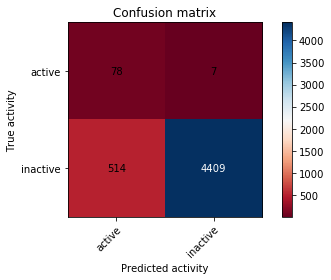

In [115]:
final = model_SMOTE(nb_b, X_yn, y_yn)

In [91]:
from sklearn import datasets

In [92]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

In [93]:
class_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
#to pickle model
#pickle.dump(final, open("finalpickle.p", "wb"))

In [ ]:
def active_inactive(amounts_float):
    positions = [59, 68, 171, 1, 151, 128, 39, 135, 21, 160]

    pred = np.zeros(195)

    for i,p in enumerate(positions):
        if amounts_float[i] == 1:
            pred[p] = 1

    # make a prediction
    prediction = output.predict(np.asarray(pred).reshape(1,-1))[0]

    message_array = ["Active",
                     "Inactive"]
    # return a message
    return message_array[prediction], amounts_float, pred

In [ ]:
active_inactive([0, 0, 1, 0, 0, 0, 0, 0, 0, 1])

In [ ]:
xdf.shape

In [ ]:
pred_zeros = np.zeros(195)

find means of active/inactive classes and find biggest difference between means of inactive/active

In [ ]:
diff_df = pd.DataFrame(xdf.groupby('Activity').mean())

In [ ]:
d = diff_df.loc[1,:] - diff_df.loc[0,:]

In [ ]:
abs(d).sort_values(ascending=False)[0:10]

In [ ]:
d.sort_values(ascending=False)[0:16]

In [ ]:
d.sort_values()[0:15]

###### Features that contribute to "active-ness"

In [ ]:
xdf.columns.get_loc('239')

In [ ]:
xdf.columns.get_loc('235')

In [ ]:
xdf.columns.get_loc('240')

In [ ]:
xdf.columns.get_loc('123')

In [ ]:
xdf.columns.get_loc('152')

In [ ]:
xdf.columns.get_loc('158')

In [ ]:
xdf.columns.get_loc('115')

###### Features that contribute to "inactive-ness"

In [ ]:
xdf.columns.get_loc('175')

In [ ]:
xdf.columns.get_loc('273')

In [ ]:
xdf.columns.get_loc('245')

In [ ]:
xdf.columns.get_loc('248')

In [ ]:
xdf.columns.get_loc('179')

In [ ]:
xdf.columns.get_loc('280')

In [ ]:
xdf.columns.get_loc('278')

In [ ]:
xdf.columns.get_loc('151')

In [ ]:
pred_ones = np.ones(195)

In [ ]:
pred_top = pred_zeros.copy()

In [ ]:
#THESE FEATURES MAKE IT ACTIVE
#pred_top[128] = 1
#pred_top[151] = 1
#pred_top[39] = 1
#pred_top[59] = 1
#pred_top[68] = 1
#pred_top[103] = 1
#pred_top[57] = 1

#THESE MAKE IT INACTIVE
pred_top[171] = 1
pred_top[160] = 1
pred_top[135] = 0
pred_top[21] = 0
pred_top[1] = 0
pred_top[46] = 0
pred_top[40] = 0
pred_top[75] = 0

In [ ]:
pred_top

##### see above if confused about whether 1 or 0 is active

In [ ]:
#all ones "fully mutated"
#should be inactive
output.predict(pred_ones.reshape(1,-1))

In [ ]:
#all zeros -- no mutations, p53 should be active
output.predict(pred_zeros.reshape(1,-1))

In [ ]:
#zeros with selected positions as ones
#should be inactive/active based on features that were selected
output.predict(pred_top.reshape(1,-1))

In [ ]:
model_assessment(nb_b, X_yn, y_yn)

In [ ]:
model_undersampling(nb_b, X_yn, y_yn)

In [ ]:
model_SMOTE(nb_b, X_yn, y_yn)

In [ ]:
model_assessment(rfc, X_yn, y_yn)

In [ ]:
model_undersampling(rfc, X_yn, y_yn)

In [ ]:
model_SMOTE(rfc, X_yn, y_yn)

In [ ]:
random_model = model_SMOTE(rfc, X_yn, y_yn)

In [ ]:
i_features = list(enumerate(random_model.feature_importances_))
i_features.sort(key=lambda x: x[1], reverse=True)

In [ ]:
i_features[0:20]